# TVB-NEST: Bridging multiscale activity by co-simulation

## Step-by-step learn how to perform a co-simulation embedding spiking neural networks into large-scale brain networks using TVB.

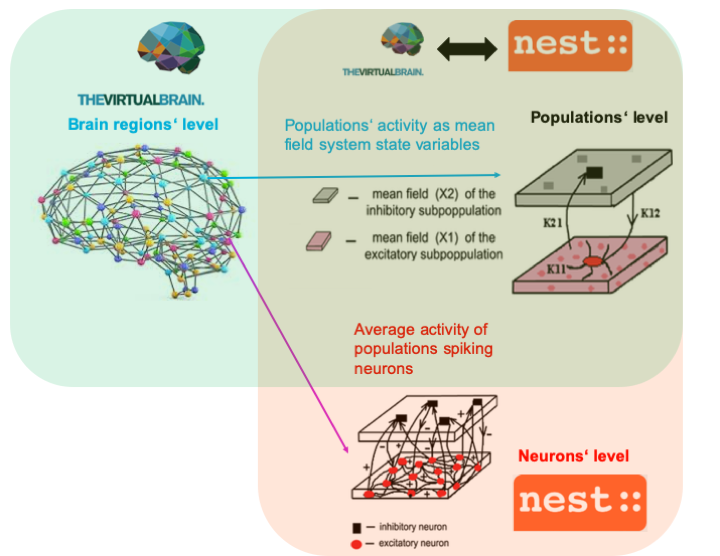

In [1]:
from IPython.core.display import Image, display
display(Image(filename='./ConceptGraph.png',  width=1000, unconfined=False))

## tvb-multiscale toolbox:

### https://github.com/the-virtual-brain/tvb-multiscale

For questions use the git issue tracker, or write an e-mail to me: dionysios.perdikis@charite.de

### TVB - NEST co-simulation with Reduced Wong-Wang model

We demonstrate a multiscale simulation <br> of a reduced Wong-Wang model [3] <br> using TVB [1, 2] for brain region modelled at coarse scale, <br> and NEST [4] for regions modelled as <br> networks of spiking neural populations.

## Reduced Wong-Wang mean field model


Synaptic gating dynamics (i.e., proportion of synapse channels open at any given time):

$\dot{S_i}^{(E)} = - \frac{1}{\tau_E}{S_i}^{(E)} + (1-{S_i}^{(E)})\gamma_{E} {r_i}^{(E)}$

$\dot{S_i}^{(I)} = - \frac{1}{\tau_I}{S_i}^{(I)} + \gamma_I{r_i}^{(I)}$

where we bound ${S_i}^{(E/I)} \in $ [0.0, 1.0], 

and $ {r_i}^{(E/I)} $ is the firing rate given by:

$ {r_i}^{(E/I)} = H({I_{syn_i}}^{(E/I)}, a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) $

where

$ H({I_{syn_i}}^{(E/I)},  a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) = \frac{a_{(E/I)}{I_{syn_i}}^{(E/I)}-b_{(E/I)}}{1-e^{-d_{(E/I)}(a_{(E/I)}{I_{syn_i}}^{(E/I)}-b_{(E/I)})}}$ 

is a sigmoidal input->output function of the input synaptic current.

The total input synaptic current to excitatory populations is given by: 

$ {I_{syn_i}}^{(E)} = W_EI_o + w_+J_{NMDA}{S_i}^{(E)} - J_{i}{S_i}^{(I)} + GJ_{NMDA}\sum_{j\neq i}C_{ij}S_{j}^{(E)}(t-\tau_{ij})$

and to inhibitory ones:

$ {I_{syn_i}}^{(I)} = W_II_o + J_{NMDA}{S_i}^{(E)} - {S_i}^{(I)} +  \lambda GJ_{NMDA}\sum_{j\neq i}C_{ij}S_{j}^{(E)}(t-\tau_{ij})$

where 
$\lambda  \in${0, 1} for (not) allowing feedforward inhibition, respectively.

## Reduced Wong-Wang mean field model

## Parameters following Ponce-Alvarez et al 2014:

- structural TVB connectivity weights $C_{ij}$
- structural TVB connectivity delays $\tau_{ij}$
- global structural brain connectivity coupling constant $G$
- overall effective external input current $I_o = 0.382nA$ 
- excitatory synaptic coupling $J_{NDMA} = 0.15nA$ 
- local feedback inhibitory synaptic coupling $J_{i} = 1.0nA$ 
- local excitatory recurrence $w_+ = 1.4$
- excitatory kinetic parameter $\gamma_E = 0.641 s$
- inhibitory kinetic parameter $\gamma_I = 1.0 s$
- excitatory (NMDA) time constant $\tau_E = \tau_{NMDA}=100ms$ 
- inhibitory (GABA) time constant $\tau_I = \tau_{GABA}=10ms$ 
- excitatory pool scaling constant $W_E = 1.0$
- inhibitory pool scaling constant $W_I = 0.7$
- excitatory sigmoidal functions parameters $a_{E} = 310nC^{-1}$, $b_{E} = 125Hz$, $d_{E} = 0.16s$
- inhibitory sigmoidal functions parameters $a_{I} = 615nC^{-1}$, $b_{I} = 177Hz$, $d_{I} = 0.087s$
- $\lambda = 1$, allowing for feedforward inhibition


## Choose your favourite integrate-and-fire neuron model from NEST

$ \dot{V}_m = - I_{leak} - I_{syn} + I_{ext} $

When $V_m > V_{th}$, emit a spike and clamp $V_m$ to $V_{reset}$ for $\tau_{ref}$ ms.

## Interfacing (coupling) TVB $\rightarrow$ NEST

#### Coupling a TVB region node state variable to a NEST population of a brain region node.

We assume that at each NEST region node, we place an excitatory (E) and an inhibitory (I) population of spiking neurons


### A. Current

$ GJ_{NMDA}\sum_{n'\in TVB->n\in NEST}C_{nn'}S_{n}^{(E)}(t-\tau_{nn'}) \rightarrow {I_{ext_i}} ^ {(E/I,\; n\in NEST)}$

#### 1. Using NEST dc generator stimulating devices as TVB "proxy" nodes:

$interfaceWeight_{𝑛′∈𝑇𝑉𝐵}TVB${$J_{NMDA}S_{𝑛′∈𝑇𝑉𝐵}^{(E)}(t)$} 
    
$\;\;\;\;\;\; \rightarrow N_{n'\in TVB}$ "TVB proxy nodes as NEST dc generators" $(C_{n'\in TVB->n\in NEST}, \tau_{n'\in TVB->n\in NEST})$
    
$\;\;\;\;\;\;\;\;\;\;\;\; \rightarrow NEST${${I_{ext_i}} ^ {(E/I,\; n\in NEST)}$}

#### 2. Directly setting ${I_{ext_i}} ^ {(E/I,\; n\in NEST)}$ NEST parameter with TVB coupling input:

$interfaceWeight_{n\in NEST}TVB${$GJ_{NMDA}\sum_{n'\in TVB->n\in NEST}C_{nn'}S_{n}^{(E)}(t-\tau_{nn'})$}$ \rightarrow NEST${${I_{ext_i}} ^ {(E/I,\; n\in NEST)}$}



### B.  Instantaneous mean  spike rate 
$interfaceWeight_{𝑛′∈𝑇𝑉𝐵}TVB${$r_{𝑛′∈𝑇𝑉𝐵}^{(E)}(t)$}  
    
$\;\;\;\;\;\; \rightarrow N_{n'\in TVB}$ "TVB proxy nodes as NEST poisson generators" $(C_{n'\in TVB->n\in NEST}, \tau_{n'\in TVB->n\in NEST})$

$\;\;\;\;\;\;\;\;\;\;\;\; \rightarrow NEST $ { $\sum_{i\in N_{(E/I)}}\sum_k\delta(t-({t_i}^k + \tau_{nn'}))  \rightarrow {I_{syn_i}} ^ {(E/I,\; n\in NEST)}$ }

where $\delta(t) = 1$ for $t=0$, and 0 otherwise

## Interfacing (updating) TVB $\leftarrow$ NEST

### Instantaneous mean spike rate 

$TVB${$r_{𝑛′∈𝑇𝑉𝐵}^{(E/I)}$}$ \leftarrow N_{n\in NEST}$ "spike detector devices" { $\frac{{{spikesNumber}^{(E/I)}_{n\in NEST}}}{N_{E/I}} * \frac{1}{dt}$}

where $dt$ is the TVB integration time step

## Simulator loop

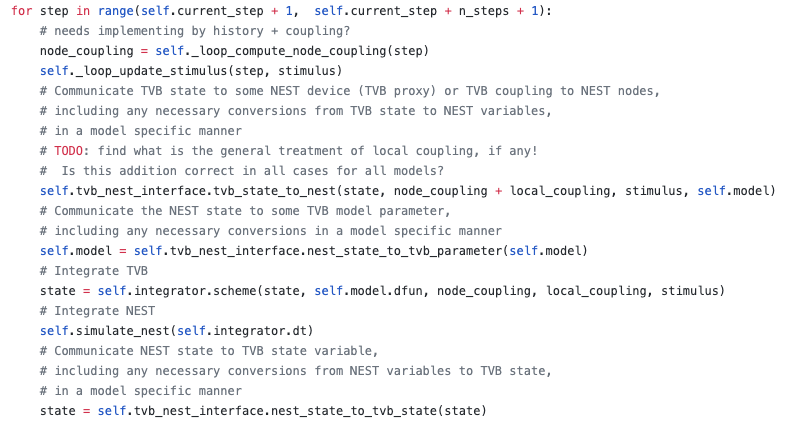

In [2]:
display(Image(filename='./simulator_loop.png',  width=600, unconfined=False))

In [3]:
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_nest.config import *
config = Config()
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'

from tvb_nest.plot.plotter import Plotter
plotter = Plotter(config)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2019-12-12 19:45:50,619 - INFO - numexpr.utils - NumExpr defaulting to 6 threads.


/home/docker/packages/tvb-root/scientific_library/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


2019-12-12 19:45:51,469 - DEBUG - matplotlib - $HOME=/home/docker
2019-12-12 19:45:51,470 - DEBUG - matplotlib - CONFIGDIR=/home/docker/.config/matplotlib
2019-12-12 19:45:51,474 - DEBUG - matplotlib - matplotlib data path: /usr/share/matplotlib/mpl-data
2019-12-12 19:45:51,475 - DEBUG - matplotlib - loaded rc file /etc/matplotlibrc
2019-12-12 19:45:51,478 - DEBUG - matplotlib - matplotlib version 3.0.2
2019-12-12 19:45:51,480 - DEBUG - matplotlib - interactive is False
2019-12-12 19:45:51,481 - DEBUG - matplotlib - platform is linux
2019-12-12 19:45:51,482 - DEBUG - matplotlib - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_colle

2019-12-12 19:45:51,525 - DEBUG - matplotlib - CACHEDIR=/home/docker/.cache/matplotlib
2019-12-12 19:45:51,527 - DEBUG - matplotlib.font_manager - Using fontManager instance from /home/docker/.cache/matplotlib/fontlist-v300.json
2019-12-12 19:45:51,651 - DEBUG - matplotlib.pyplot - Loaded backend agg version unknown.
2019-12-12 19:45:52,095 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.projections.ProjectionMatrix.conductances = Attr(field_type=<class 'dict'>, default={'air': 0.0, 'skin': 1.0, 'skull': 0.01, 'brain': 1.0}, required=False)
2019-12-12 19:45:52,117 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.time_series.TimeSeries.labels_dimensions = Attr(field_type=<class 'dict'>, default={}, required=True)
2019-12-12 19:45:52,176 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab

## 1. Load structural data <br> (minimally a TVB connectivity)

2019-12-12 19:45:52,237 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f910b450dd8>
2019-12-12 19:45:52,238 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-12-12 19:45:52,239 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f910b450dd8>
2019-12-12 19:45:52,240 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-12-12 19:45:52,362 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:45:52,364 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2019-12-12 19:45:52,395 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2019-12-12 19:45:52,645 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans

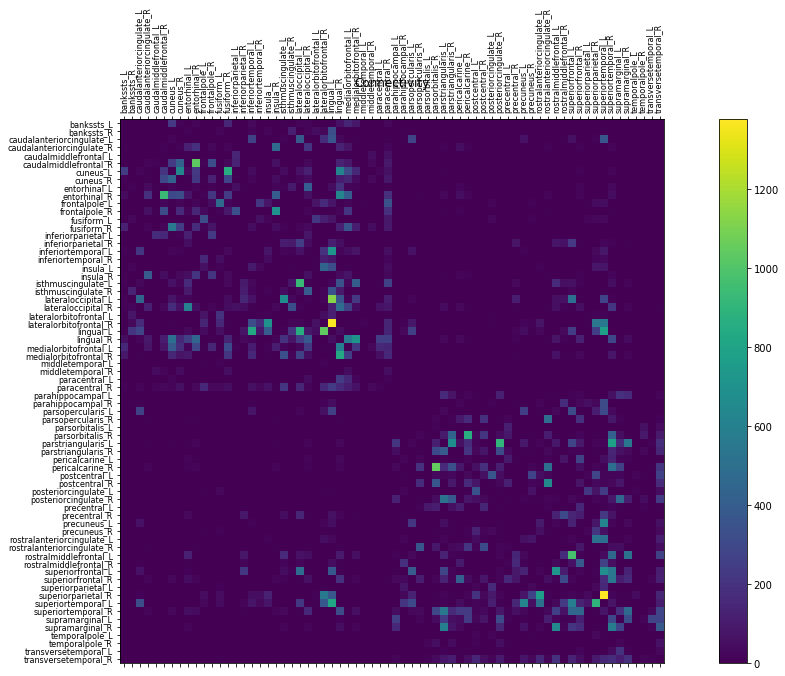

2019-12-12 19:45:54,336 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f910b316d30>
2019-12-12 19:45:54,337 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-12-12 19:45:54,337 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f910b316d30>
2019-12-12 19:45:54,337 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-12-12 19:45:54,452 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:45:54,453 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2019-12-12 19:45:54,713 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:45:54,799 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:45:54,800 - DEBUG - matplotlib.axes._base - title position was updated manually, not adjusting
2019-12-12 19:45:55,049 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:45:55,

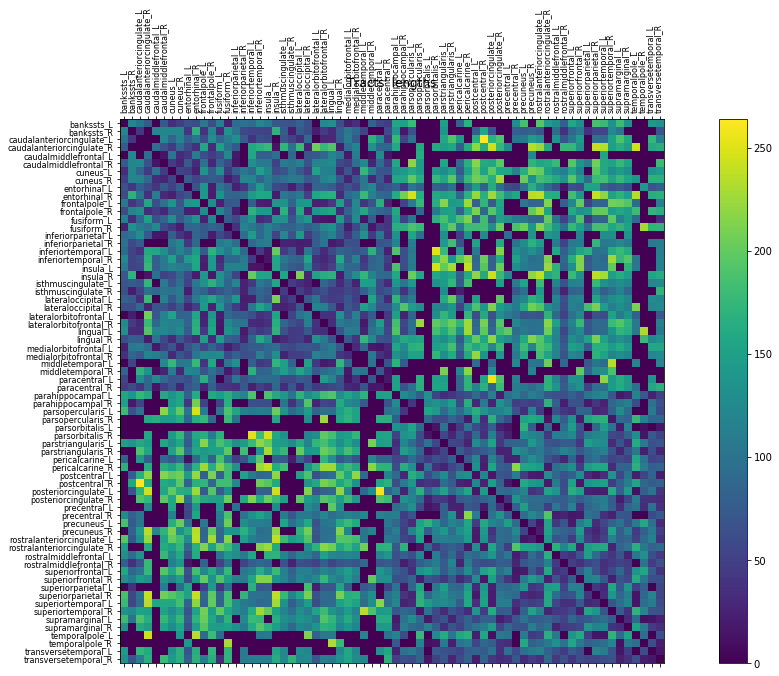

(<Figure size 1440x720 with 2 Axes>,
 <Figure size 1440x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91066d3710>)

In [4]:
from tvb.datatypes.connectivity import Connectivity
connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
connectivity.configure()
plotter.plot_tvb_connectivity(connectivity)

## 2. Prepare TVB simulator <br> (region mean field model, integrator, monitors etc)

In [5]:
from tvb_nest.simulator_tvb.simulator import Simulator
from tvb_nest.simulator_tvb.models.reduced_wong_wang_exc_io_inh_i \
    import ReducedWongWangExcIOInhI
from tvb.simulator.monitors import Raw  # , Bold, EEG

# Create a TVB simulator and set all desired inputs
# (connectivity, model, surface, stimuli etc)
# We choose all defaults in this example
simulator = Simulator()
simulator.model = ReducedWongWangExcIOInhI()
    
simulator.connectivity = connectivity
simulator.integrator.dt = \
    float(int(np.round(simulator.integrator.dt / 
                       config.nest.NEST_MIN_DT))) * config.nest.NEST_MIN_DT
simulator.integrator.noise.nsig = np.array([0.001])

mon_raw = Raw(period=simulator.integrator.dt)
# Some extra monitors for neuroimaging measures:
# mon_bold = Bold(period=2000.)
# mon_eeg = EEG(period=simulator.integrator.dt)
simulator.monitors = (mon_raw, )  # mon_bold, mon_eeg

2019-12-12 19:45:56,485 - WARNING - tvb.simulator.common - psutil module not available: no warnings will be issued when a
    simulation may require more memory than available
2019-12-12 19:45:56,497 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.coupling.HyperbolicTangent.b = NArray(label=':math:`b`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2019-12-12 19:45:56,502 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.coupling.Kuramoto.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2019-12-12 19:45:56,651 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.oscillator.Generic2dOscillator.gamma = NArray(label=':math:`\\gamma`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
20

## 3. Build and connect the NEST network model <br> (networks of spiking neural populations for fine-scale <br>regions, stimulation devices, spike detectors etc)

In [6]:
# Select the regions for the fine scale modeling with NEST spiking networks
number_of_regions = simulator.connectivity.region_labels.shape[0]
nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# We model parahippocampal cortices (left and right) with NEST
for id in range(number_of_regions):
    if simulator.connectivity.region_labels[id].find("hippo") > 0:
        nest_nodes_ids.append(id)
        
from tvb_nest.simulator_nest.builders.models.red_ww_exc_io_inh_i \
    import RedWWExcIOInhIBuilder

# Build a NEST network model with the corresponding builder
# Using all default parameters for this example
nest_model_builder = \
    RedWWExcIOInhIBuilder(simulator, nest_nodes_ids, config=config)

# or...

# # ----------------------------------------------------------------------------------------------------------------
# # ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# # ----------------------------------------------------------------------------------------------------------------

# # Connection weights between the distinct populations:
# # Inhibition to excitation feedback inhibition
# # that could result from Feedback Inhibition Control
# # (see Deco, Ponce-Alvarez et al, J. of Neuroscience, 2014)
# nest_model_builder.w_ee = 1.4
# nest_model_builder.J_i = 1.0

# # Common order of neurons' number per population:
# nest_model_builder.populations_order = 100
# # Populations' configurations
# nest_model_builder.populations = [
#     {"label": "E", "model": nest_model_builder.default_population["model"],
#      "params": {}, "scale": 1, "nodes": None},  # None means "all"
#     {"label": "I", "model": nest_model_builder.default_population["model"],
#      "params": {}, "scale": 0.7, "nodes": None}  # None means "all"
#                                  ]

# # Within region-node connections
# nest_model_builder.default_populations_connection["conn_spec"]["rule"] = "pairwise_bernoulli"
# nest_model_builder.default_populations_connection["conn_spec"]["p"] = 0.5

# pop_weight_fun = lambda weight: {"distribution": "normal", "mu": weight, "sigma": 0.1*np.abs(weight)}

# nest_model_builder.populations_connections = [
#     {"source": "E", "target": "E",  # # E -> E This is a self-connection for population "E"
#      "model": nest_model_builder.default_populations_connection["model"],
#      "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
#      "weight": pop_weight_fun(nest_model_builder.w_ee), 
#      "delay": nest_model_builder.default_populations_connection["delay"],
#      "receptor_type": 0, "nodes": None},  # None means "all"
#     {"source": "E", "target": "I",  # E -> I
#      "model": nest_model_builder.default_populations_connection["model"],
#      "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
#      "weight": pop_weight_fun(1.0), 
#      "delay": nest_model_builder.default_populations_connection["delay"],
#      "receptor_type": 0, "nodes": None},  # None means "all"
#     {"source": "I", "target": "E",  # I -> E
#      "model": nest_model_builder.default_populations_connection["model"],
#      "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
#      "weight": pop_weight_fun(-nest_model_builder.J_i), 
#      "delay": nest_model_builder.default_populations_connection["delay"],
#      "receptor_type": 0, "nodes": None},  # None means "all"
#     {"source": "I", "target": "I",  # I -> I This is a nmbd-connection for population "I"
#      "model": nest_model_builder.default_populations_connection["model"],
#      "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
#      "weight": pop_weight_fun(-1.0), 
#      "delay": nest_model_builder.default_populations_connection["delay"],
#      "receptor_type": 0, "nodes": None},  # None means "all"
#                                             ]

# node_weight_fun = lambda source_nest_node_id=None, target_nest_node_id=None: \
#     np.maximum(1.0, simulator.model.G[0]*(1.0+0.3*np.random.normal()))

# # Among/Between region-node connections
# # Given that only the AMPA population of one region-node couples to
# # all populations of another region-node,
# # we need only one connection type
# nest_model_builder.nodes_connections = [
#     {"source": "E", "target": ["E", "I"],
#      "model": nest_model_builder.default_nodes_connection["model"],
#      "conn_spec": nest_model_builder.default_nodes_connection["conn_spec"],
#      "weight":  node_weight_fun(), # weight scaling the TVB connectivity weight
#      # additional delay to the one of TVB connectivity:
#      "delay": nest_model_builder.default_nodes_connection["delay"],  
#      # Each region emits spikes in its own port:
#      "receptor_type": 0, "source_nodes": None, "target_nodes": None}  # None means "all"
#                                         ]

# # Creating  devices to be able to observe NEST activity:
# # Labels have to be different
# nest_model_builder.output_devices = []
# connections = OrderedDict({})
# #          label <- target population
# connections["E"] = "E"
# connections["I"] = "I"
# nest_model_builder.output_devices.append(
#     {"model": "spike_detector", "params": {},
#      "connections": connections, "nodes": None})  # None means all here
# connections = OrderedDict({})
# connections["Excitatory"] = "E"
# connections["Inhibitory"] = "I"
# params = dict(nest_model_builder.config.nest.NEST_OUTPUT_DEVICES_PARAMS_DEF["multimeter"])
# params["interval"] = nest_model_builder.monitor_period
# nest_model_builder.output_devices.append(
#     {"model": "multimeter", "params": params,
#      "connections": connections, "nodes": None})  # None means all here

# # ----------------------------------------------------------------------------------------------------------------
# # ----------------------------------------------------------------------------------------------------------------
# # ----------------------------------------------------------------------------------------------------------------

nest_network = nest_model_builder.build_nest_network()

2019-12-12 19:45:57,569 - INFO - tvb_nest.simulator_nest.builders.base - Loading a NEST instance...
2019-12-12 19:45:57,569 - INFO - tvb_nest.simulator_nest.builders.base - Loading a NEST instance...
2019-12-12 19:45:57,571 - INFO - tvb_nest.simulator_nest.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2019-12-12 19:45:57,571 - INFO - tvb_nest.simulator_nest.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2019-12-12 19:45:57,572 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2019-12-12 19:45:57,572 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2019-12-12 19:45:57,573 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2019-12-12 19:45:57,573 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc

2019-12-12 19:45:58,387 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-12 19:45:58,393 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-12 19:45:58,393 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-12 19:45:58,401 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-12 19:45:58,401 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <

## 4. Build the TVB-NEST interface

In [7]:
from tvb_nest.interfaces.builders.models.red_ww_exc_io_inh_i import RedWWexcIOinhIBuilder

# Build a TVB-NEST interface with all the appropriate connections between the
# TVB and NEST modelled regions
# Using all default parameters for this example
tvb_nest_builder = RedWWexcIOinhIBuilder(simulator, nest_network, 
                                         nest_nodes_ids, exclusive_nodes=True)

# or...

# # ----------------------------------------------------------------------------------------------------------------
# # ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# # ----------------------------------------------------------------------------------------------------------------
#
# TVB -> NEST:

# ------------Modifications to the default options of the builder---------------

# # For directly setting an external current parameter in NEST neurons instantaneously:
# interface_weight_fun = lambda nest_node_id=None: \
#                               np.maximum(1.0, 5.0 + 2.0*np.random.normal())
# tvb_nest_builder.tvb_to_nest_interfaces = \
#     [{"model": "current",  "parameter": "I_e",
# # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
#       "interface_weights": interface_weight_fun(), # 5.0
# # ----------------------------------------------------------------------------------------------------------------
# #            TVB state var -> NEST population
#       "connections": {"S_e": ["E", "I"]},
#       "nodes": None}]  # None means all here

#
# interface_weight_fun = lambda tvb_node_id=None, nest_node_id=None: \
#     np.maximum(1.0, simulator.model.G[0] *(1.0 + 0.3*np.random.normal()))
# #
# # For injecting current to NEST neurons via dc generators acting as TVB proxy nodes with TVB delays:
# tvb_nest_builder.tvb_to_nest_interfaces = \
#     [{"model": "dc_generator", "params": {},
# # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
#       "interface_weights": 100.0,  # Applied outside NEST for each interface device
#       "weights": interface_weight_fun(), # simulator.model.G[0],  #  To multiply TVB connectivity weight:
# #             To add to TVB connectivity delay:
#       "delays": nest_network.nodes_min_delay,
# # ----------------------------------------------------------------------------------------------------------------
# #             TVB state var -> NEST population
#       "connections": {"S_e": ["E", "I"]},
#       "source_nodes": None, "target_nodes": None}]  # None means all here
#
# #For spike transmission from TVB to NEST via poisson generators acting as TVB proxy nodes with TVB delays:
# tvb_nest_builder.tvb_to_nest_interfaces = \
#      [{"model": "poisson_generator", "params": {},
# # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
#        "interface_weights": 200.0,  # Applied outside NEST for each interface device
#        "weights": interface_weight_fun(), # simulator.model.G[0],  #  To multiply TVB connectivity weight:
#        "delays": nest_network.nodes_min_delay,
#        "receptor_types": 0,
# # ----------------------------------------------------------------------------------------------------------------
# #            TVB state var -> NEST population
#        "connections": {"R_e": ["E", "I"]},
#        "source_nodes": None, "target_nodes": None}]  # None means all here
#
# # NEST -> TVB:
# # Use S_e and S_i instead of r_e and r_i
# # for transmitting to the TVB state variables directly
# connections = OrderedDict()
# #            TVB <- NEST
# connections["R_e"] = ["E"]
# connections["R_i"] = ["I"]
# tvb_nest_builder.nest_to_tvb_interfaces = \
#     [{"model": "spike_detector", "params": {},
# # ------------------Properties potentially set as function handles with args (nest_node_id=None)--------------------
#       "weights": 1.0, "delays": 0.0,
# # ------------------------------------------------------------------------------------------------------------------
#       "connections": connections, "nodes": None}]  # None means all here

# tvb_nest_builder.w_tvb_to_current = 1000 * tvb_nest_builder.tvb_model.J_N # nA (TVB) -> pA (NEST)
# tvb_nest_builder.w_tvb_to_spike_rate = 1.0  # r parameter is in the order of 1000 Hz for WongWang model
# # (assuming spikes/ms in TVB) and given the division of spikes' number with dt in ms:
# tvb_nest_builder._spikes_to_tvb_rate = 1.0
#
# # ----------------------------------------------------------------------------------------------------------------
# # ----------------------------------------------------------------------------------------------------------------
# # ----------------------------------------------------------------------------------------------------------------

tvb_nest_model = tvb_nest_builder.build_interface()

2019-12-12 19:45:58,563 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2019-12-12 19:45:58,567 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb_nest.simulator_tvb.models.wilson_cowan_constraint.WilsonCowan.state_variable_boundaries = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2019-12-12 19:45:58,568 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb_nest.simulator_tvb.models.wilson_cowan_constraint.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, requ

## 5. Configure simulator, simulate, gather results

In [8]:
# Configure the simulator with the TVB-NEST interface...
simulator.configure(tvb_nest_interface=tvb_nest_model)
# ...and simulate!
t = time.time()
results = simulator.run(simulation_length=100.0)
# Integrate NEST one more NEST time step so that multimeters get the last time point
# unless you plan to continue simulation later
simulator.simulate_nest(simulator.tvb_nest_interface.nest_instance.GetKernelStatus("resolution"))
# Clean-up NEST simulation
if simulator.simulate_nest == simulator.tvb_nest_interface.nest_instance.Run:
    simulator.tvb_nest_interface.nest_instance.Cleanup()
print("\nSimulated in %f secs!" % (time.time() - t))


2019-12-12 19:46:00,650 - DEBUG - tvb_nest.simulator_tvb.models.reduced_wong_wang_exc_io_inh_i - building observer with code:
def observe(state):
    S_e,S_i,R_e,R_i = state
    return numpy.array([S_e,S_i,R_e,R_i])
2019-12-12 19:46:00,651 - INFO - tvb_nest.simulator_tvb.simulator - Region simulation with 68 ROI nodes
2019-12-12 19:46:00,651 - INFO - tvb_nest.simulator_tvb.simulator - Region simulation with 68 ROI nodes
2019-12-12 19:46:00,654 - DEBUG - tvb_nest.simulator_tvb.simulator - Estimated history shape is (879.3333333333334, 4, 68, 1)
2019-12-12 19:46:00,654 - DEBUG - tvb_nest.simulator_tvb.simulator - Estimated history shape is (879.3333333333334, 4, 68, 1)
2019-12-12 19:46:00,658 - INFO - tvb_nest.simulator_tvb.simulator - Memory requirement estimate: simulation will need about 4.4 MB
2019-12-12 19:46:00,658 - INFO - tvb_nest.simulator_tvb.simulator - Memory requirement estimate: simulation will need about 4.4 MB
2019-12-12 19:46:00,665 - DEBUG - tvb_nest.simulator_tvb.simul

In [9]:
# Gather the results
t = results[0][0]
source = results[0][1]

# Put the results in a Timeseries instance
from tvb_scripts.time_series.model import TimeSeriesRegion

source_ts = TimeSeriesRegion(source, time=t,
               connectivity=simulator.connectivity,
               labels_ordering=["Time", "Synaptic Gating Variable", "Region", "Neurons"],
               labels_dimensions=
                    {"Synaptic Gating Variable": ["S_e", "S_i"],
                     "Region": simulator.connectivity.region_labels.tolist()},
               sample_period=simulator.integrator.dt)
source_ts.configure()
source_ts

## Plot results

In [10]:
S_e = source_ts.get_state_variables("S_e")
S_i = source_ts.get_state_variables("S_i")

2019-12-12 19:46:26,737 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:27,119 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:27,319 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:27,629 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:27,832 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:28,010 - DEBUG - matplotlib.axes._base - update_title_pos


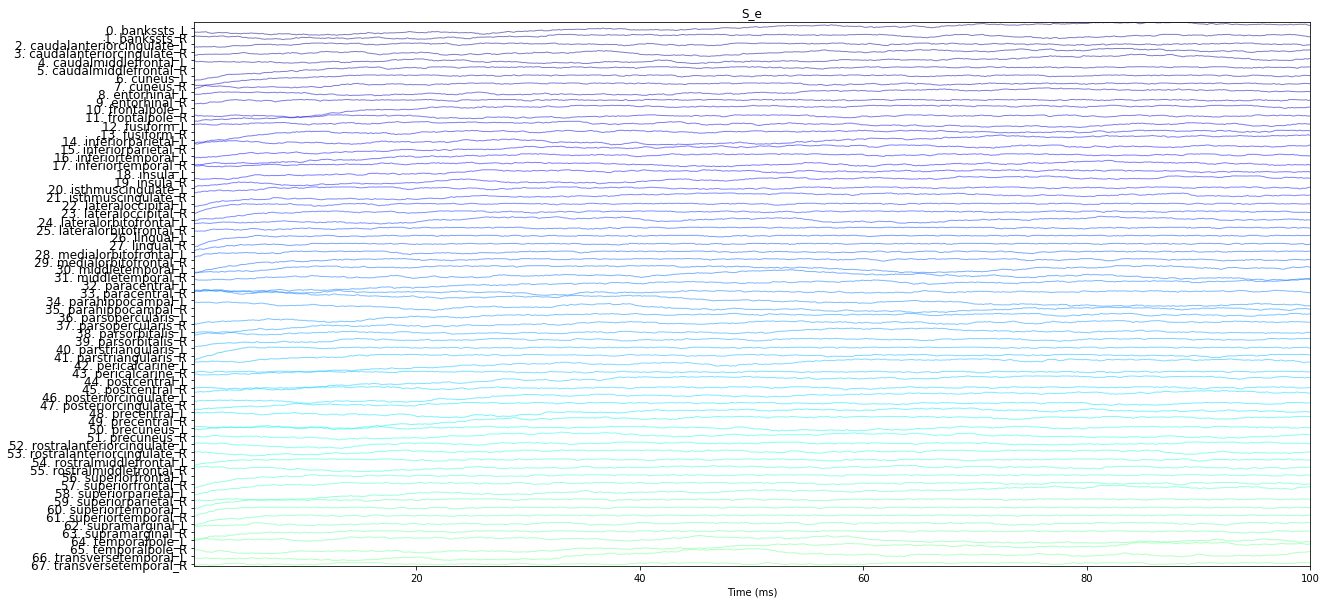

2019-12-12 19:46:28,411 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:28,695 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-12 19:46:28,848 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:29,117 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:29,377 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:29,566 - DEBUG - matplotlib.axes._base - update_title_pos


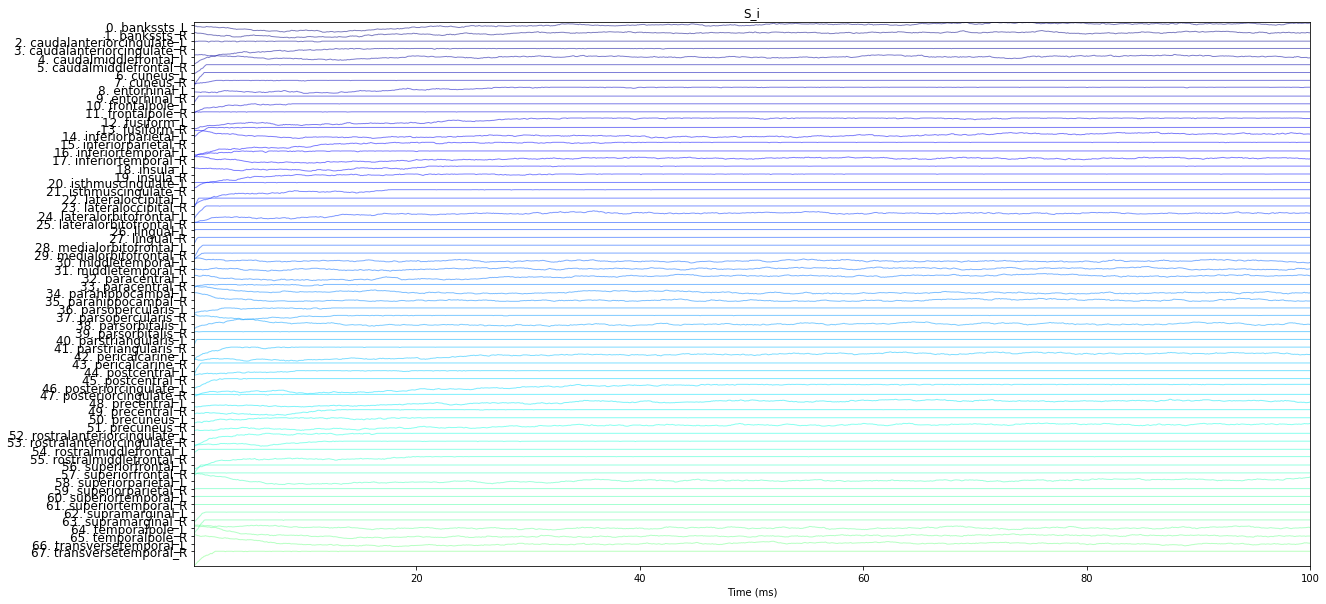

<Figure size 432x288 with 0 Axes>

In [11]:
# For raster plot:
plotter.plot_raster(S_e, title="Region Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(S_i, title="Region Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);

2019-12-12 19:46:59,156 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:59,456 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:59,560 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:59,812 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:59,856 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:46:59,896 - DEBUG - matplotlib.axes._base - update_title_pos


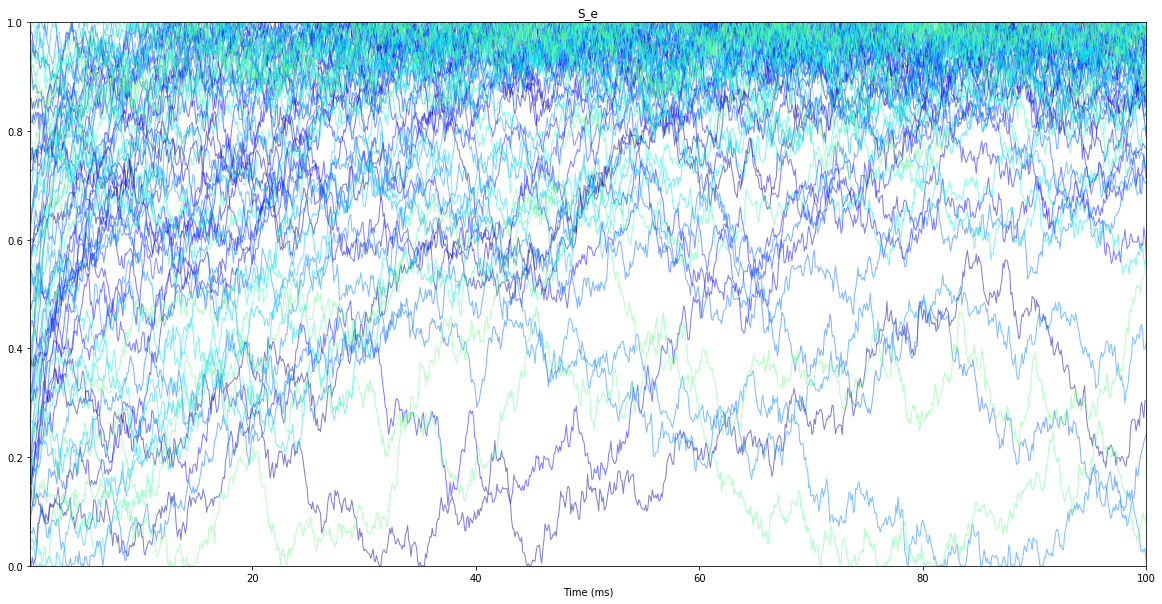

2019-12-12 19:47:00,293 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:00,596 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-12 19:47:00,658 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:00,829 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:00,870 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:00,900 - DEBUG - matplotlib.axes._base - update_title_pos


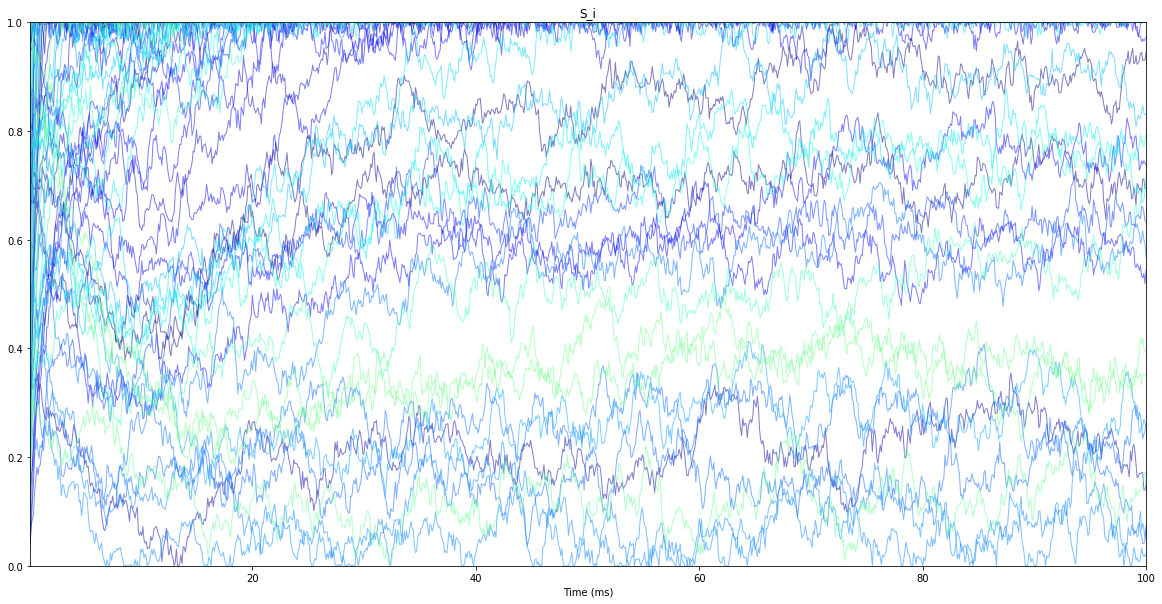

<Figure size 432x288 with 0 Axes>

In [13]:
# For timeseries plot:
plotter.plot_timeseries(S_e, title="Region Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_timeseries(S_i, title="Region Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);

2019-12-12 19:47:01,151 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,229 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,248 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,320 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,345 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,365 - DEBUG - matplotlib.axes._base - update_title_pos


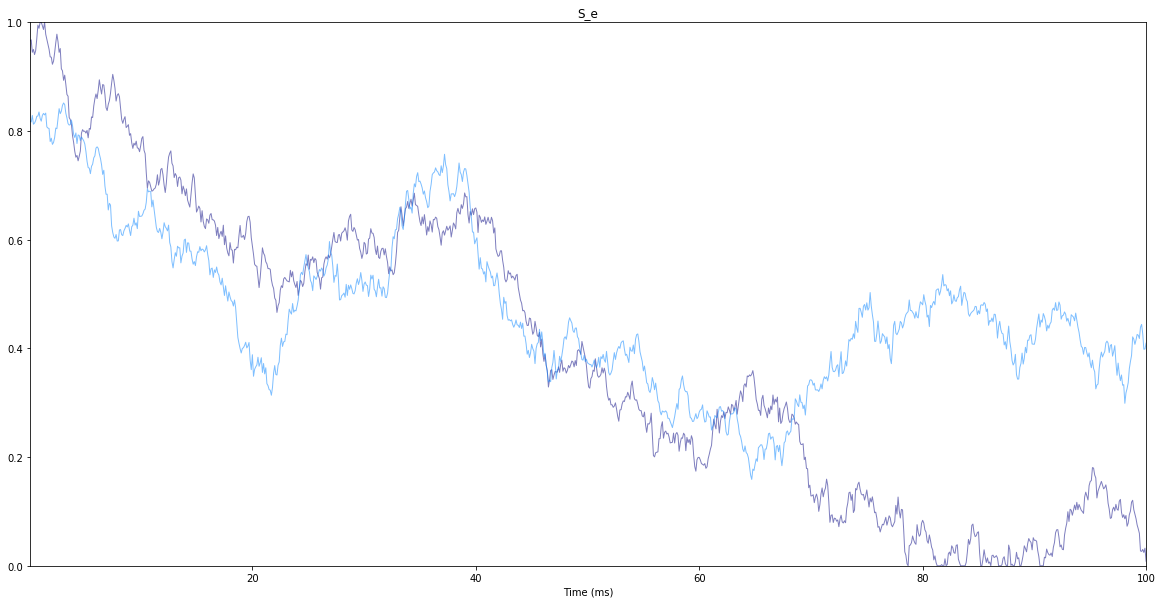

2019-12-12 19:47:01,456 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,552 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-12 19:47:01,575 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,639 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,659 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:01,674 - DEBUG - matplotlib.axes._base - update_title_pos


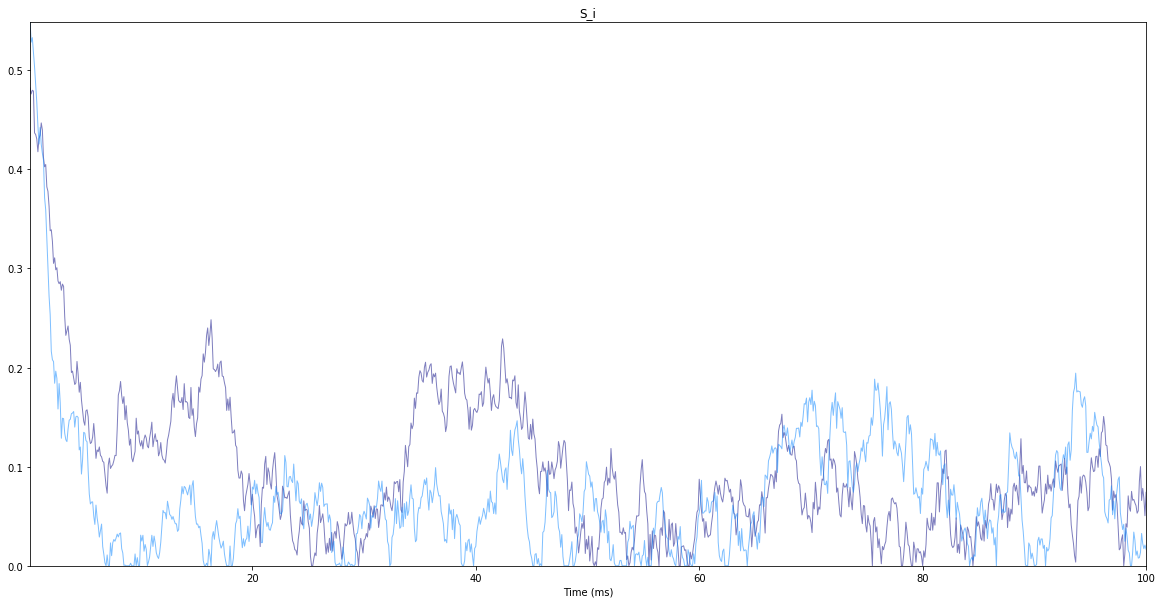

<Figure size 432x288 with 0 Axes>

In [14]:
# For timeseries plot:
plotter.plot_timeseries(S_e.get_subspace(tvb_nest_model.nest_nodes_ids), 
                    title="Region Time Series Raster", 
                    figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_timeseries(S_i.get_subspace(tvb_nest_model.nest_nodes_ids), 
                    title="Region Time Series Raster", 
                    figsize=config.figures.NOTEBOOK_SIZE);

### Interactive time series plot

### Plot population mean membrane potential time series

In [15]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# # Use this to skip completely the tvb-scripts plotter
# # from tvb.simulator.plot.timeseries_interactive import TimeSeriesInteractive
# # tvb_plotter = TimeSeriesInteractive(time_series=source_ts._tvb)
# # tvb_plotter.configure()
# # tvb_plotter.show()
# plotter.plot_timeseries_interactive(source_ts)

2019-12-12 19:47:01,747 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-12-12 19:47:02,431 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:02,459 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,059 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,076 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,099 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,116 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,202 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,225 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,267 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,283 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,299 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,322 - DEBUG - matplotlib.axes

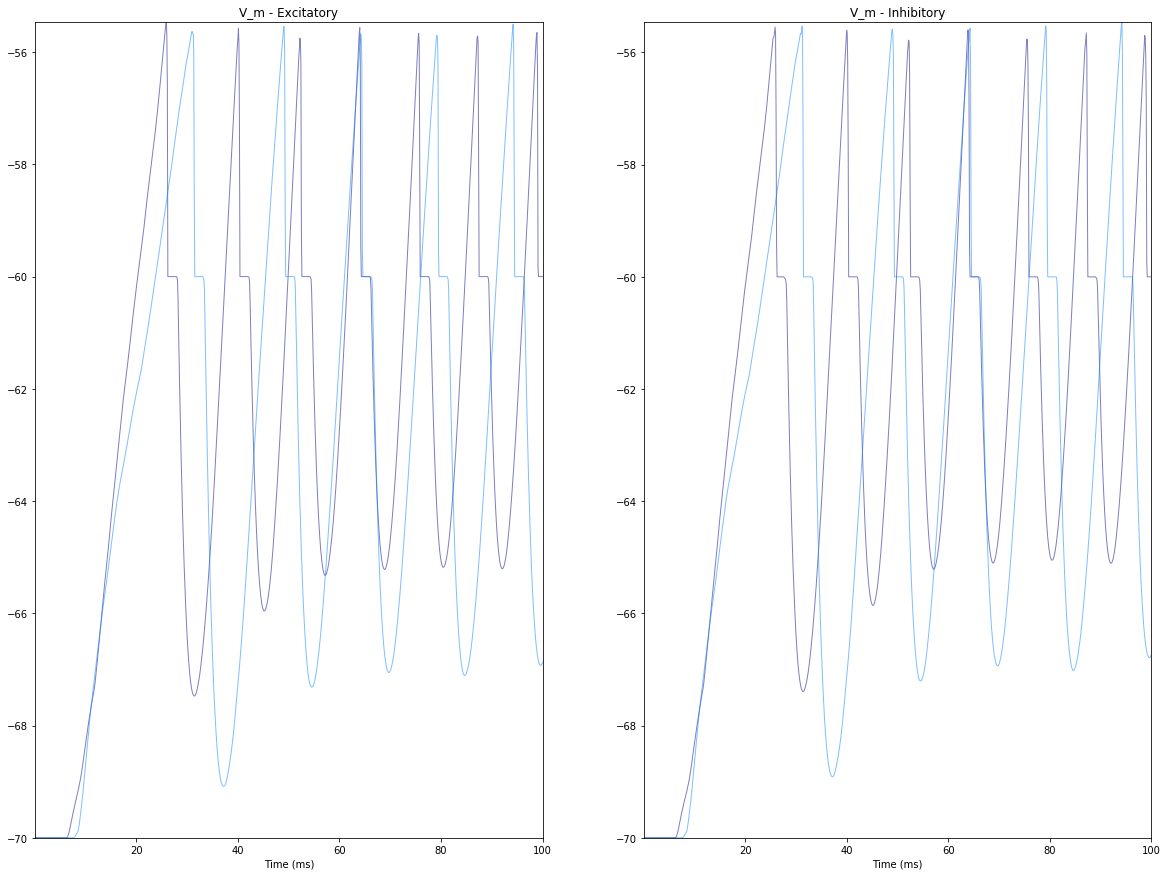

<Figure size 432x288 with 0 Axes>

In [16]:
%matplotlib inline 
# Plot NEST multimeter variables
multimeter_mean_data = tvb_nest_model.get_mean_data_from_NEST_multimeter_to_TVBTimeSeries()
if multimeter_mean_data is not None:
    plotter.plot_multimeter_timeseries(multimeter_mean_data, plot_per_variable=True,
                                       time_series_class=TimeSeriesRegion, 
                                       time_series_args={}, var_pop_join_str=" - ", 
                                       default_population_label="population",
                                       title="NEST region time series")


2019-12-12 19:47:03,466 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,491 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,610 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,623 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,643 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,660 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,750 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,763 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,791 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,806 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,828 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:03,847 - DEBUG - matplotlib.axes._base - update_title_pos


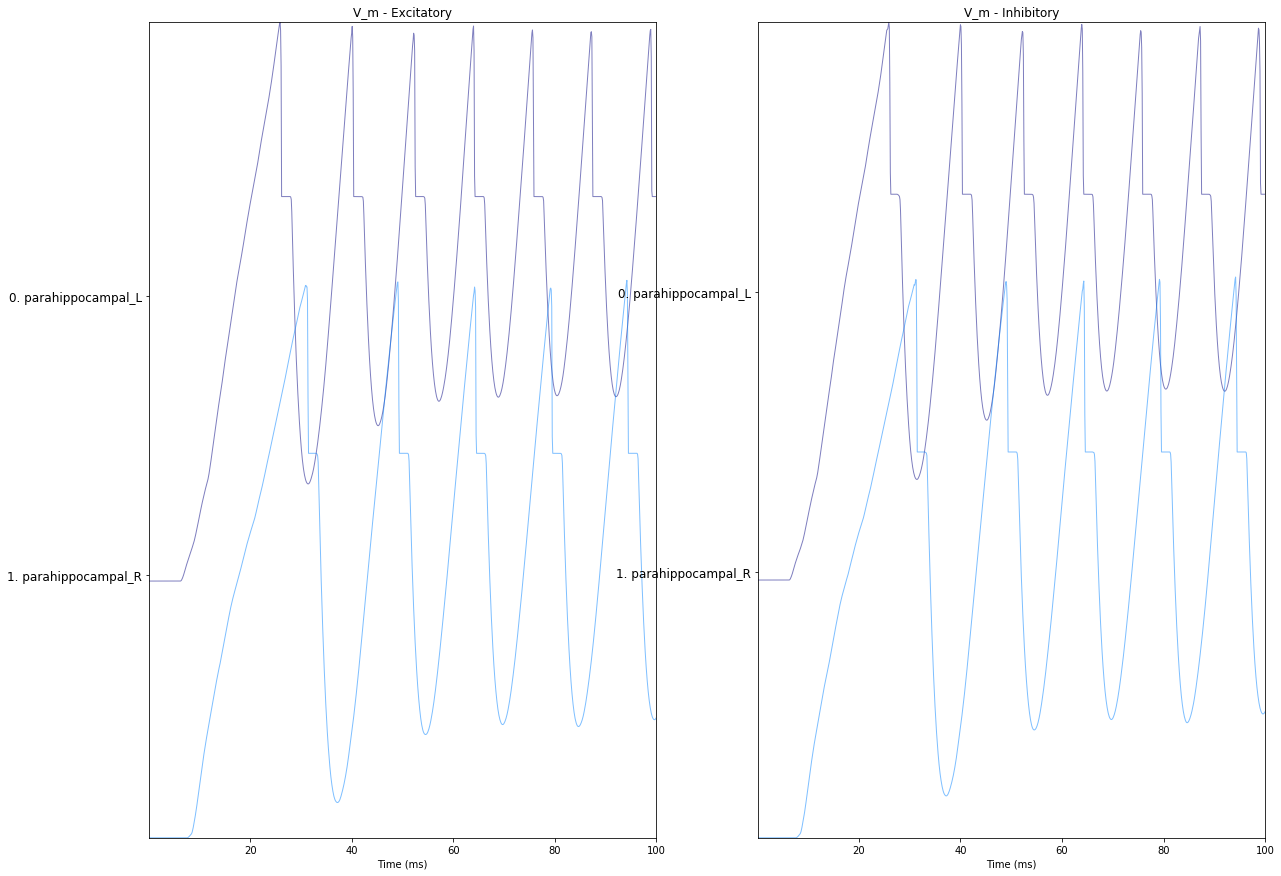

<Figure size 432x288 with 0 Axes>

In [17]:
if multimeter_mean_data is not None:
    plotter.plot_multimeter_raster(multimeter_mean_data, plot_per_variable=True,
                                   time_series_class=TimeSeriesRegion, 
                                   time_series_args={}, var_pop_join_str=" - ", 
                                   default_population_label="population",
                                   title="NEST region time series raster")

### Plot spikes' raster and mean spike rate for NEST regions

2019-12-12 19:47:04,165 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,190 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,217 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,228 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,321 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,335 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,350 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,360 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,377 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,390 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,406 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,419 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,542 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:04,556 -

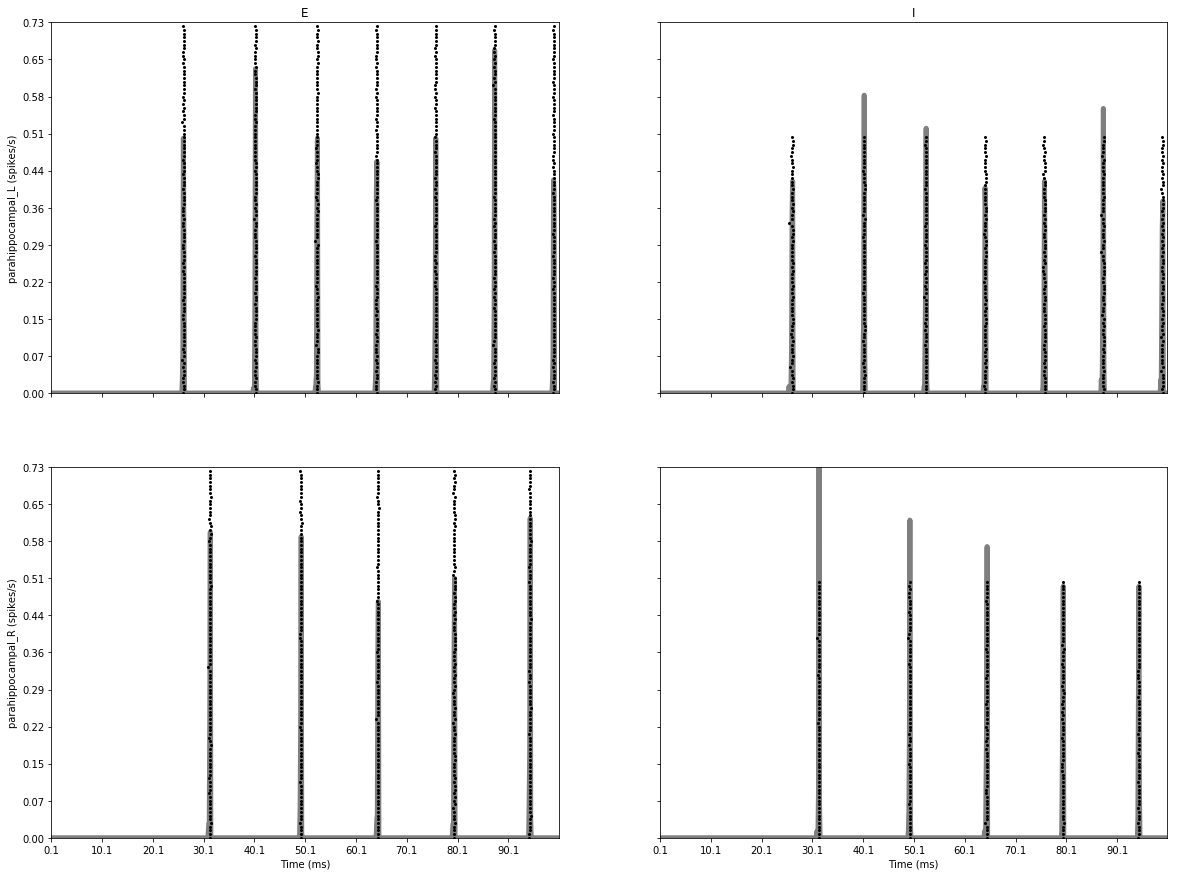

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot spikes and mean field spike rates
rates, spike_detectors = \
    tvb_nest_model.get_mean_spikes_rates_from_NEST_to_TVBTimeSeries(
        spikes_kernel_width=simulator.integrator.dt,  # ms
        spikes_kernel_overlap=0.0, time=t)
if spike_detectors is not None:
    plotter.plot_spikes(spike_detectors, rates=rates, title='Population spikes and mean spike rate')

### Plotting NEST network activity using xarray

TimeSeries (
  Dimensions ....... ['Time', 'Variable', 'Region', 'Population']
  Length ........... 1000
  Sample period .... 0.1
  Time units ....... 
  Time-series name . Mean data from NEST multimeter
  Time-series type . TimeSeries
  [min, median, max]  [-70, -62.7423, -55.4643]
  dtype ............ float64
  shape ............ (1000, 1, 2, 2)
)
2019-12-12 19:47:05,526 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,549 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,565 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,579 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,601 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,619 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,648 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,662 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:05,748 - DEBUG - matplotlib.axe

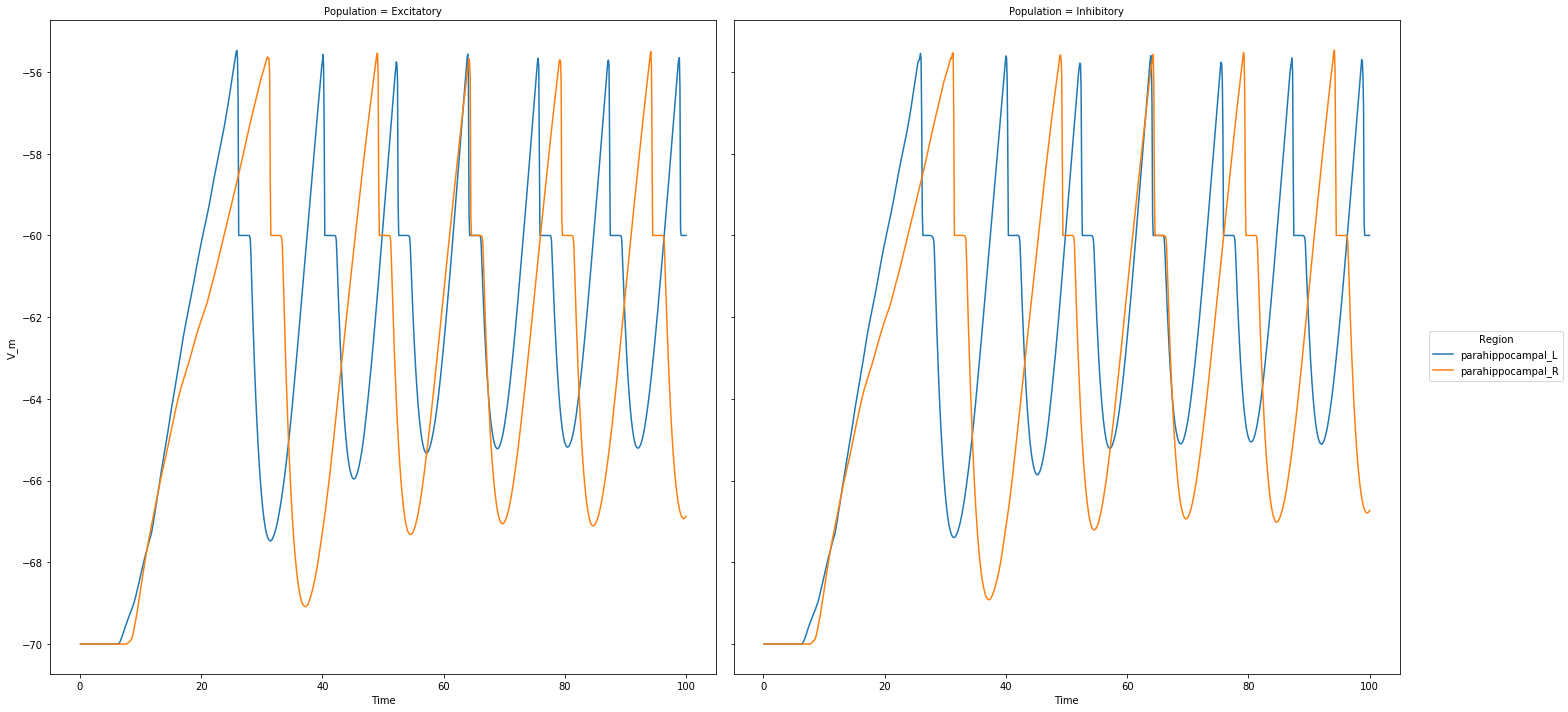

2019-12-12 19:47:06,179 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,293 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,331 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,401 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,429 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,445 - DEBUG - matplotlib.axes._base - update_title_pos


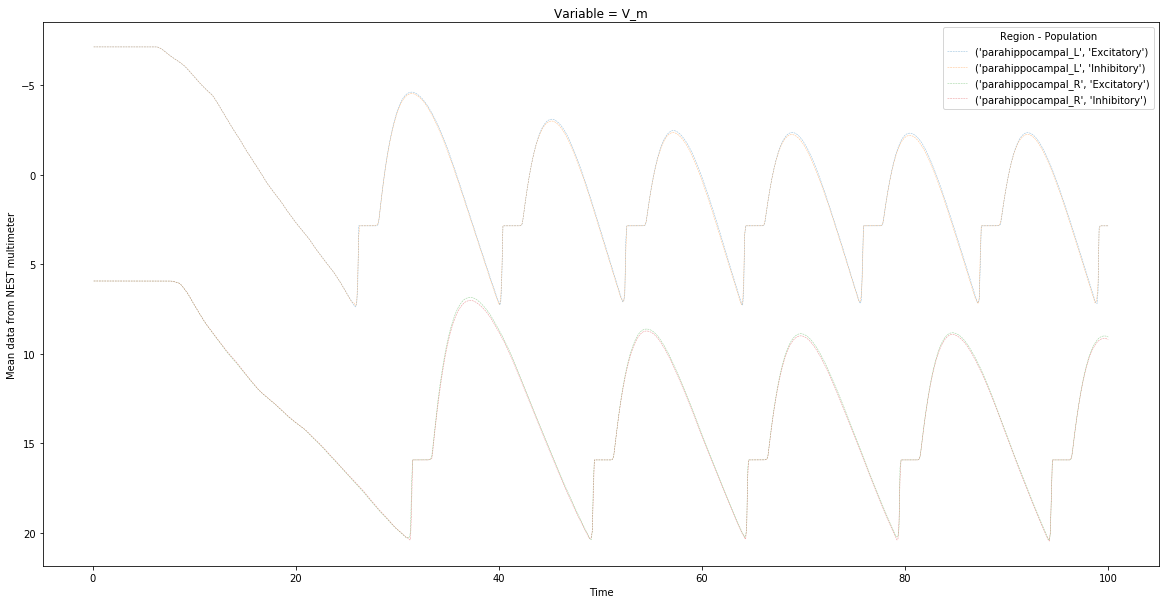

In [19]:
from tvb_scripts.time_series.time_series_xarray import TimeSeries as TimeSeriesXarray
multimeter_mean_data = nest_network.get_mean_data_from_multimeter()
ts = TimeSeriesXarray(multimeter_mean_data)
print(ts)
# ts.plot(plotter=plotter, )
ts.plot_timeseries(plotter=plotter, figsize=(20, 10))
ts.plot_raster(plotter=plotter, linestyle="--", alpha=0.5, linewidth=0.5, figsize=(20, 10))

### Plotting NEST network spiking activity using xarray

2019-12-12 19:47:06,767 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,787 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,814 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,837 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:06,861 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f91023d3fd0>
2019-12-12 19:47:06,861 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-12-12 19:47:06,862 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f91023d3fd0>
2019-12-12 19:47:06,862 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-12-12 19:47:06,875 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:07,014 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:07,126 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-12 19:47:07,243 - DEBUG - matp

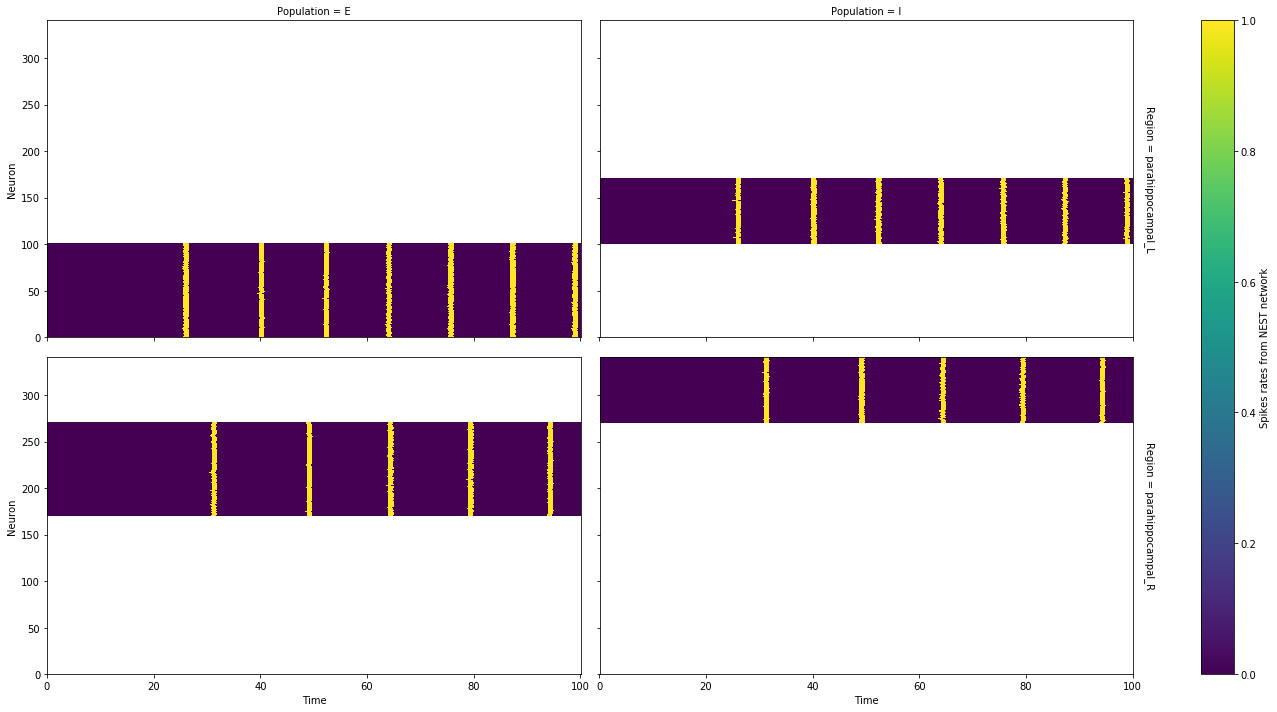

In [20]:
rates = nest_network.compute_spikes_rates(
            mode="per_neuron", population_devices=None, regions=None,
            devices_dim_name="Population", name="Spikes rates from NEST network",
            spikes_kernel_width=1.0, # spikes_kernel_n_intervals=10,
            spikes_kernel_overlap=0.5, min_spike_interval=None, time=t,
            spikes_kernel=None)[0]

rates.plot(x=rates.dims[0], y=rates.dims[3], row=rates.dims[2], col=rates.dims[1], robust=True, figsize=(20, 10))
plotter.base._save_figure(figure_name="Spike rates per neuron")

# References

1 Paula Sanz Leon, Stuart A. Knock, M. Marmaduke Woodman, Lia Domide, <br>
  Jochen Mersmann, Anthony R. McIntosh, Viktor Jirsa (2013) <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling  <br>
  and multimodal neuroimaging. Brain Connectivity 3:121–145. <br>
   
3 Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, <br>
  Patric Hagmann and Maurizio Corbetta. <br>
  Resting-State Functional Connectivity Emerges from Structurally and <br>
  Dynamically Shaped Slow Linear Fluctuations. <br>
  The Journal of Neuroscience 32(27), 11239-11252, 2013.<br>

4 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>